In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 4.9 MB/s 


In [3]:
!pip install Bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Viewing The Null/NaN Data in our Dataset.**




In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum().sort_values(ascending=False) / len(df) * 100)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Total,687.000000,177.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,77.104377,19.865320,0.224467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


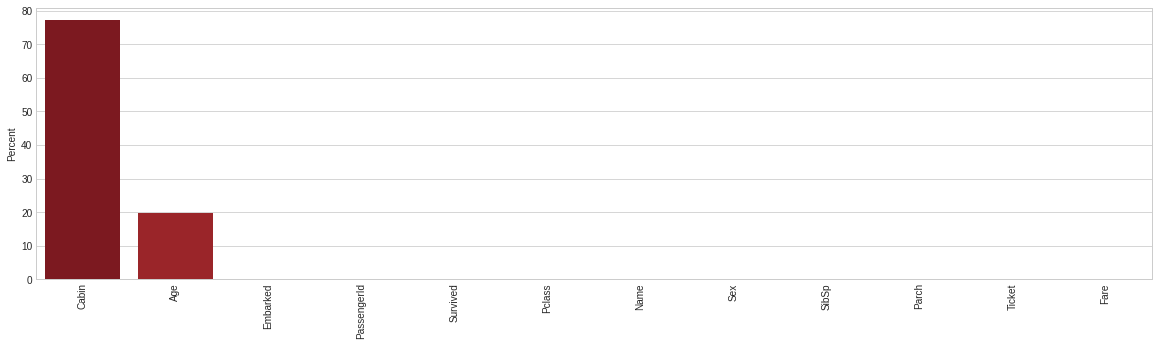

In [14]:
missing = missing_percentage(train)

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=missing.index, y='Percent', data=missing, palette='Reds_r')
plt.xticks(rotation=90)

display(missing.T.style.background_gradient(cmap='Reds', axis=1))

,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
Total,687.000000,177.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percent,77.104377,19.865320,0.224467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


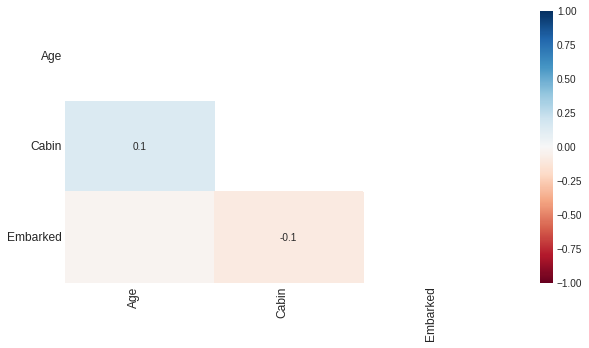

In [9]:
missing = missing_percentage(train)
msno.heatmap(train, figsize=(10,5), fontsize=12)
plt.xticks(rotation=90)
display(missing.T.style.background_gradient(cmap='Reds', axis=1))

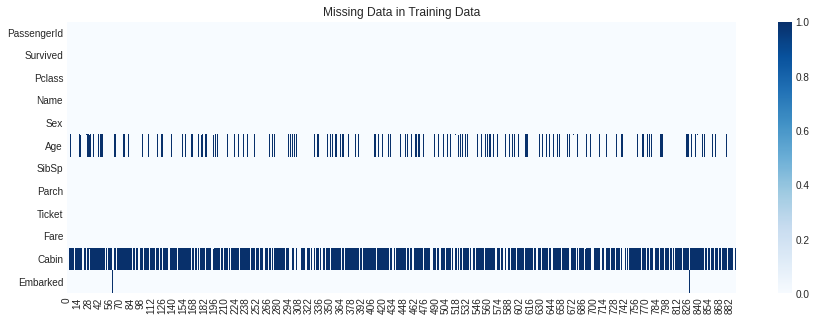

In [ ]:
plt.subplots(figsize=(15,5))  
sns.heatmap(train.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in Training Data")
plt.show()

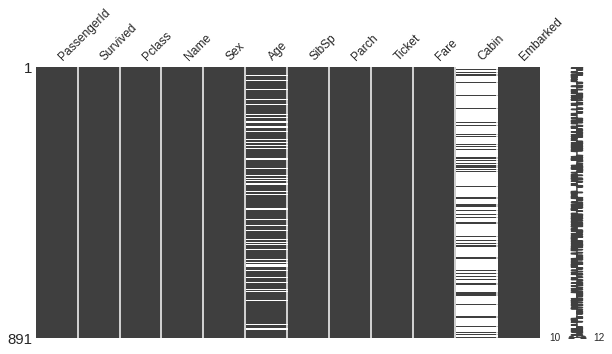

In [ ]:
msno.matrix(train, figsize=(10,5), fontsize=12)

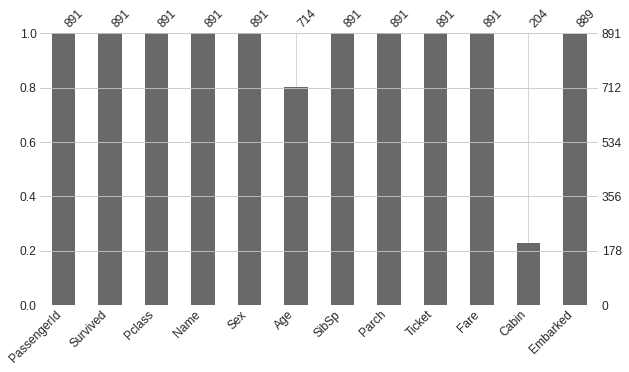

In [ ]:
msno.bar(train, figsize=(10,5), fontsize=12)

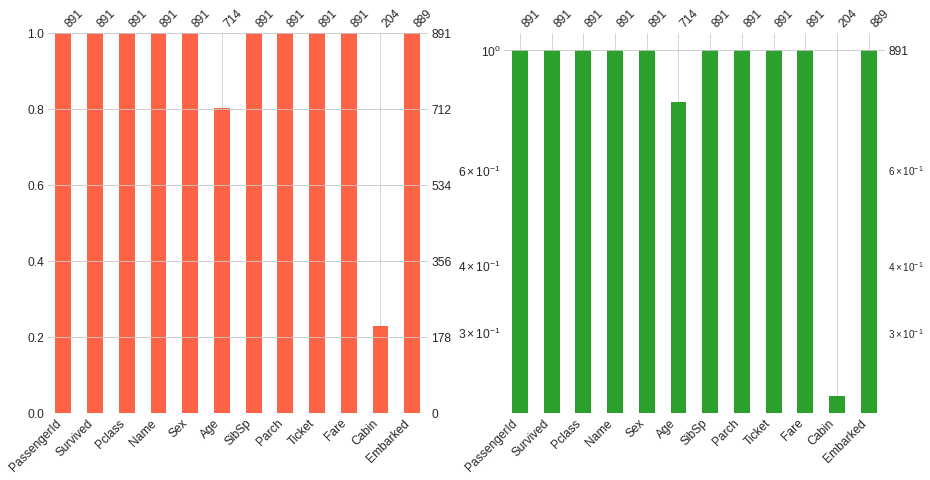

In [ ]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
msno.bar(train, color="tomato", fontsize=12, ax=ax1);

ax2 = fig.add_subplot(1,2,2)
msno.bar(train, log=True, color="tab:green", fontsize=12, ax=ax2);

In [ ]:
# Determine the null values:
trainNullVals = train.isnull().sum().to_frame()
trainNullVals

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train.isnull().sum().sum()

866

In [ ]:
trainNullVals = pd.DataFrame(train.isnull().sum())
trainNullVals = trainNullVals.rename(columns = {0:'Null'})

trainNullVals

,Null
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
trainNullValsPercent = (trainNullVals/ trainNullVals.sum()) * 100
trainNullValsPercent

,Null
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.438799
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
1#Determining the non-null values:
trainNotNullVals = train.notna().sum().to_frame()
trainNotNullVals = trainNotNullVals.rename(columns = {0:'Not Null'})

trainNotNullVals

,Not Null
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [ ]:
trainNotNullVals = (trainNotNullVals/ trainNotNullVals.sum()) * 100
trainNotNullVals

,Not Null
PassengerId,9.067779
Survived,9.067779
Pclass,9.067779
Name,9.067779
Sex,9.067779
Age,7.266436
SibSp,9.067779
Parch,9.067779
Ticket,9.067779
Fare,9.067779


In [ ]:
# Combine the dataframes:
trainNullCount = pd.concat([trainNullVals, trainNotNullVals], ignore_index=False, axis=1).reset_index()
trainNullCount = trainNullCount.rename(columns = {'index':'Category'})
trainNullCount

,Category,Null,Not Null
0,PassengerId,0,9.067779
1,Survived,0,9.067779
2,Pclass,0,9.067779
3,Name,0,9.067779
4,Sex,0,9.067779
5,Age,177,7.266436
6,SibSp,0,9.067779
7,Parch,0,9.067779
8,Ticket,0,9.067779
9,Fare,0,9.067779


In [ ]:
# Generate plot that compares between the null and not null values.
fig = px.bar(trainNullCount, x="Category", y = ['Not Null', 'Null'])
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(
    title={'text':"Null Values Visualization",
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},
    xaxis_title = "Category",
    yaxis_title = "Count")
fig.update_layout(legend_title_text = 'Status')
fig.show()

# **Treating Missing Data (Null/NaN data) in our Dataset.**

Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

>1. isnull(): Generate a boolean mask indicating missing values
>2. notnull(): Opposite of isnull()
>3. dropna(): Return a filtered version of the data
>4. fillna(): Return a copy of the data with missing values filled or imputed
>5. replace()
>6. interpolate()

Common Operations on NaN data:
> 1. When mean/sum/std/median are performed on a Series which contains missing values, these values would be treated as zero.
> 2. When add/div/sub are performed, the result is NaN.
> 3. If all data is NaN, the sum() result is zero.

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.notnull().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
"""
train.dropna(inplace = True)
"""

'\ntrain.dropna(inplace = True)\n'

In [ ]:
"""train.isnull().sum()"""

'train.isnull().sum()'

In [ ]:
"""
train.Age = train.Age.fillna(train.Age.mean()) # It can be median too because it is a numerical variable.
"""

'\ntrain.Age = train.Age.fillna(train.Age.mean()) # It can be median too because it is a numerical variable.\n'

In [ ]:
"""
train.Age = train.Age.fillna(train.Cabin.mean()) # It can be median too because it is a numerical variable.
"""

'\ntrain.Age = train.Age.fillna(train.Cabin.mean()) # It can be median too because it is a numerical variable.\n'

In [ ]:
"""
train.Age = train.Age.fillna(train.Embarked.mean()) # It can be median too because it is a numerical variable.
"""

'\ntrain.Age = train.Age.fillna(train.Embarked.mean()) # It can be median too because it is a numerical variable.\n'

### Using Simple Imputer function from Sklearn module to impute the values (i.e., to replace missing Values in Python.)

In [ ]:
updated_train = train
updated_train["Age"] = updated_train["Age"].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.
my_imputer.fit_transform(train.isnull())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train.Age.isnull().sum()

0

In [ ]:
updated_train = train
updated_train["Cabin"] = updated_train["Cabin"].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.
my_imputer.fit_transform(train.isnull())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train.Cabin.isnull().sum()

0

In [ ]:
updated_train = train
updated_train["Embarked"] = updated_train["Embarked"].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = "median") #It can be any statistical parameter.
my_imputer.fit_transform(train.isnull())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train.Embarked.isnull().sum()

0

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,False,1,0,A/5 21171,7.2500,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,False,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,False,0,0,STON/O2. 3101282,7.9250,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,False,1,0,113803,53.1000,False,False
4,5,0,3,"Allen, Mr. William Henry",male,False,0,0,373450,8.0500,False,False


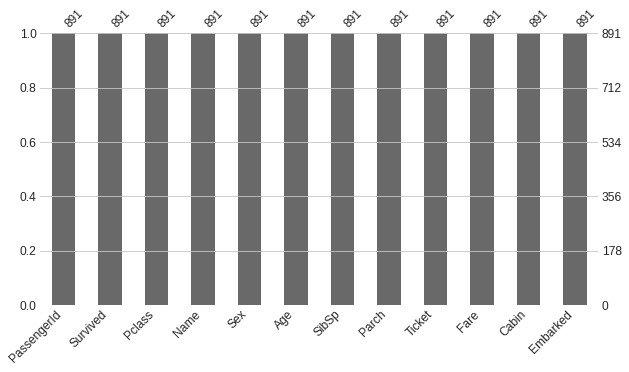

In [ ]:
msno.bar(train, figsize=(10,5), fontsize=12)